<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/DEADPOOL/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Exploratory Data Analysis (EDA) Using Big Data


## Group : DEADPOOL
## Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
|KEE SHIN PEARL         | A21EC0190     | Assignment 3   |
|MUHAMMAD AMIR JAMIL BIN JAMLUS          | A21EC0202     | Assignment 4   |
|MUHAMMAD IZZUDDIN BIN SHABRIN           | A21EC0083   | Assignment 5    |
|UMAR HAZIQ BIN MUHAMAD NORHISHAM            |  A21EC0235   | Assignment 5     |

## Objective

The objective of this assignment is to perform Exploratory Data Analysis (EDA) on a large dataset using big data tools and techniques. EDA is a critical step in understanding the characteristics of a dataset and uncovering insights that can inform further analysis and decision-making.

## Dataset Selection

The dataset selected for analysis a collection of Spotify data with 1 million data entries, sourced from Kaggle.

[Spotify_1Million_Tracks](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data)


This dataset was extracted from the Spotify platform using the Python library "Spotipy", which allows users to access music data provided via APIs. The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data.

<br>

| Audio Features    | Description |
| ----------- | ----------- |
| Popularity   | Track popularity (0 to 100)        |
| Year   | Year released (2000 to 2023)|
| Danceability | Track suitability for dancing (0.0 to 1.0)  |
|Energy   | The perceptual measure of intensity and activity (0.0 to 1.0) |
|Key  | The key, the track is in (-1 to -11) |
|Loudness   |Overall loudness of the track in decibels (-60 to 0 dB)  |
|Mode   | Modality of the track (Major '1'/ Minor '0')  |
|Speechiness |Presence of spoken words in the track  |
|Acousticness   | Confidence measure from 0 to 1 of whether the track is acoustic |
|Instrumentalness   | Whether track contain vocals (0.0 to 1.0)  |
|Liveness   | Presence of audience in the recording (0.0 - 1.0)  |
|Valence   |Musical positiveness (0.0 to 1.0)  |
|Tempo  |Tempo of the track in beats per minute (BPM)  |
|Time_signature   |Estimated time signature (3 to 7)  |
|Duration_ms   |Duration of track in milliseconds  |



## Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting Up the Environment

### Import Library

Install and import the the relevant library packages from python that will be useful for carrying out this assignment on Exploratory Data Analysis (EDA) Using Big Data. These libraries demonstrates a comprehensive approach to data analysis and visualization as the libraries are capable to handle, analyze, and visualize data effectively.

In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Helper Functions and Classes

In [4]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [5]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [6]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [7]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [10]:
import warnings
warnings.simplefilter('ignore')

## Data Preprocessing

### Reading Data

In [11]:
path = '/content/drive/MyDrive/spotify_data.csv'
chunks = []

# Read the file in chunks and append to the list
for chunk in pd.read_csv(path, chunksize=10000):
    chunks.append(chunk)

# Concatenate the list of chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [12]:
df

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


### Overview of the Data

In [13]:
# total number of elements in the dataframe
df.size

23195280

In [14]:
# row and column of the dataframe
df.shape

(1159764, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [16]:
# overview of the dataframe
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Unnamed: 0,1159764,0,0.0%,1159764,100.0%,int64
1,artist_name,1159764,0,0.0%,64159,5.53%,object
2,track_name,1159764,0,0.0%,882361,76.08%,object
3,track_id,1159764,0,0.0%,1159764,100.0%,object
4,popularity,1159764,0,0.0%,98,0.01%,int64
5,year,1159764,0,0.0%,24,0.0%,int64
6,genre,1159764,0,0.0%,82,0.01%,object
7,danceability,1159764,0,0.0%,1364,0.12%,float64
8,energy,1159764,0,0.0%,3116,0.27%,float64
9,key,1159764,0,0.0%,12,0.0%,int64


### Column of the dataset

In [17]:
# List column names of the dataframe
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

From the list there is column 'Unamed: 0' where it usually presents index of the dataframe.

In [18]:
# comparing the number of unique values of 'Unnamed: 0' and the number of rows
len(df['Unnamed: 0'].unique()) == df.shape[0]

True

The output is true. Hence, 'Unnamed: 0' is index for the dataframe. The column is unrelated and should be remove.

In [19]:
# drop unnamed column
df.drop(columns = ['Unnamed: 0'], inplace = True)

From the column name there is also 'duration_ms', where it represent the duration of a song available in Spotify. The ms represents milliseconds, for easier calulation the ms is changed to minutes

In [20]:
df['duration_ms']

0          240166
1          216387
2          158960
3          304293
4          244320
            ...  
1159759    344013
1159760    285067
1159761    214253
1159762    239133
1159763    212227
Name: duration_ms, Length: 1159764, dtype: int64

In [21]:
# Transform milliseconds in the duration_ms column to minutes
df['duration_mins'] = df['duration_ms']/60000
df.drop(columns= 'duration_ms', inplace=True)

In [22]:
df['duration_mins']

0          4.002767
1          3.606450
2          2.649333
3          5.071550
4          4.072000
             ...   
1159759    5.733550
1159760    4.751117
1159761    3.570883
1159762    3.985550
1159763    3.537117
Name: duration_mins, Length: 1159764, dtype: float64

In [23]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_mins'],
      dtype='object')

Remove any characters that are not alphanumeric or whitespace from the 'artist_name' column. This  step can help avoid issues arising from special characters within the data rows.

In [24]:
df['artist_name'] = df['artist_name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

### Data Type

In [25]:
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

From running df.info() , the total memory usage used is 168.1+ MB. Next, run reduce_mem_usage(df) for memory optimization where the datatypes of the dataframe are transformed according to the size.

In [27]:
reduce_mem_usage(df)

Memory usage of dataframe is 168.12 MB
Memory usage after optimization is: 147.84 MB
Decreased by 12.1%


,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406006,3,4.002767
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182007,4,3.606450
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832001,4,2.649333
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.960999,4,5.071550
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.863998,4,4.072000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.950996,3,5.733550
1159760,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897003,4,4.751117
1159761,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.075996,4,3.570883
1159762,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.884995,3,3.985550


After executing the reduce_mem_usage() function the total of memory usage is reduced from 168.12MB to 147.84 MB

In [28]:
df.dtypes

artist_name         category
track_name          category
track_id            category
popularity              int8
year                   int16
genre               category
danceability         float32
energy               float32
key                     int8
loudness             float32
mode                    int8
speechiness          float32
acousticness         float32
instrumentalness     float32
liveness             float32
valence              float32
tempo                float32
time_signature          int8
duration_mins        float32
dtype: object

### Missing Value

In [29]:
# check null
df.isnull().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_mins       0
dtype: int64

In [30]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


There are no missing values in the dataframe

### Duplicated Value

In [31]:
# check if duplicated rows exist in the dataset
drop_duplicates(df)

No duplicate rows were found.


Since 'track_id' is the feature that uniquely identifies each track, there should be no duplicates.

In [32]:
df.duplicated(subset=['track_id']).all()

False

It shows that there are no duplicated rows in the dataframe

## Exploratory Data Analysis

### Summary Statistics:

Use df.describe() to obtain summary statistics for numerical columns.
Calculate counts, unique values, and frequency distributions for categorical columns.

In [33]:
# summary statistics for numerical columns
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981352e+00,6.346533e-01,9.281479e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213772e+02,3.885879e+00,4.159363e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,4.676967e-01,2.490436e+00
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.455000e-02
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,4.000000e+00,3.018183e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,4.000000e+00,3.762400e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,4.000000e+00,4.781892e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,5.000000e+00,1.000082e+02


In [34]:
# Check number of unique values for all the columns
df.nunique()

artist_name           63737
track_name           882361
track_id            1159764
popularity               98
year                     24
genre                    82
danceability           1364
energy                 3116
key                      12
loudness              37368
mode                      2
speechiness            1655
acousticness           5398
instrumentalness       5402
liveness               1816
valence                2177
tempo                135697
time_signature            5
duration_mins        258021
dtype: int64

### Artist

In [35]:
# unique value counts by artist
artists_count = df['artist_name'].value_counts()
artists_count

Traditional              4058
                         2957
Grateful Dead            2320
Johann Sebastian Bach    2125
                         1548
                         ... 
Bud Freeman                 1
Roddy Hart                  1
Bud Powell Trio             1
Jeo Yellow                  1
zzzaam                      1
Name: artist_name, Length: 63737, dtype: int64

In [36]:
# total number of artist
artists_unique = df['artist_name'].nunique()

print(f'Total number of unique artists: {artists_unique}')

Total number of unique artists: 63737


In [45]:
# artist by mean popularity
artists_df = df.groupby(by =['artist_name']).mean().reset_index().sort_values(by='popularity', ascending=False)
artists_df

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
40070,NewJeans,85.333333,2022.166667,0.744667,0.679833,6.500000,-4.568833,0.166667,0.092817,0.279767,5.116667e-07,0.127300,0.604667,133.764328,4.0,3.251008
17197,Elley Duh,85.000000,2020.000000,0.410000,0.611000,4.000000,-8.271000,0.000000,0.046700,0.022800,0.000000e+00,0.116000,0.089900,185.727005,3.0,3.074133
45966,Rema,80.666667,2021.000000,0.845000,0.748000,8.333333,-5.570667,0.666667,0.047133,0.319000,1.913000e-03,0.114333,0.786667,108.006996,4.0,3.549478
27371,Jogja Hip Hop Foundation,80.000000,2013.000000,0.741000,0.801000,11.000000,-4.840000,1.000000,0.275000,0.147000,2.730000e-05,0.082100,0.561000,193.910995,4.0,4.900883
9723,Chani Nattan,80.000000,2021.000000,0.847000,0.558000,8.000000,-5.855000,0.000000,0.066300,0.325000,0.000000e+00,0.135000,0.495000,98.061996,4.0,2.184633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23968,Horse Power Overload,0.000000,2019.000000,0.509143,0.940143,4.285714,-4.330714,0.428571,0.082143,0.000537,1.442514e-02,0.174843,0.415286,120.466713,4.0,3.726933
6650,Biswajit Roy Chowdhury,0.000000,2001.000000,0.510333,0.362000,5.666667,-14.792333,0.666667,0.041333,0.910333,8.106667e-01,0.094700,0.339000,114.884003,4.0,19.532217
24019,Hotfox,0.000000,2012.000000,0.506000,0.588000,8.000000,-8.894000,1.000000,0.031000,0.695000,2.070000e-03,0.039100,0.352000,111.045998,4.0,4.257967
53547,Takami,0.000000,2004.000000,0.844000,0.451000,0.000000,-5.982000,0.000000,0.035500,0.390000,7.970000e-01,0.224000,0.885000,91.558998,4.0,1.157333


In [40]:
# top 10 artist over mean popularity
top_artist = artists_df.head(10)
top_artist

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
40069,NewJeans,85.333333,2022.166667,0.744667,0.679833,6.500000,-4.568833,0.166667,0.092817,0.279767,5.116667e-07,0.127300,0.604667,133.764328,4.0,3.251008
17200,Elley Duhé,85.000000,2020.000000,0.410000,0.611000,4.000000,-8.271000,0.000000,0.046700,0.022800,0.000000e+00,0.116000,0.089900,185.727005,3.0,3.074133
45960,Rema,80.666667,2021.000000,0.845000,0.748000,8.333333,-5.570667,0.666667,0.047133,0.319000,1.913000e-03,0.114333,0.786667,108.006996,4.0,3.549478
9719,Chani Nattan,80.000000,2021.000000,0.847000,0.558000,8.000000,-5.855000,0.000000,0.066300,0.325000,0.000000e+00,0.135000,0.495000,98.061996,4.0,2.184633
52681,SunKissed Lola,80.000000,2022.000000,0.710000,0.610000,2.000000,-4.674000,1.000000,0.035100,0.415000,2.670000e-05,0.181000,0.404000,120.031998,3.0,4.504167
27363,Jogja Hip Hop Foundation,80.000000,2013.000000,0.741000,0.801000,11.000000,-4.840000,1.000000,0.275000,0.147000,2.730000e-05,0.082100,0.561000,193.910995,4.0,4.900883
20183,Fujii Kaze,80.000000,2021.000000,0.631500,0.745500,3.500000,-6.729500,0.500000,0.039500,0.087460,2.512045e-02,0.241000,0.437500,127.551498,4.0,3.429108
10592,Cian Ducrot,79.000000,2022.000000,0.509000,0.619000,1.000000,-4.102000,1.000000,0.039100,0.355000,0.000000e+00,0.073900,0.544000,155.955002,4.0,2.875783
42143,Oxlade,79.000000,2022.000000,0.649000,0.655000,10.000000,-5.534000,0.000000,0.065200,0.307000,0.000000e+00,0.220000,0.793000,92.900002,4.0,2.459683
28570,Jung Kook,78.000000,2022.000000,0.644000,0.839667,0.666667,-4.842667,0.666667,0.050800,0.209667,1.580000e-03,0.321333,0.411333,120.028328,4.0,3.409500


Tracks

In [37]:
track_count = df['track_name'].value_counts()
track_count

Intro                                    466
Home                                     313
Forever                                  229
Hold On                                  224
Stay                                     220
                                        ... 
Highway Blues - Demo                       1
Highway Boogie                             1
Highway Bound                              1
Highway Boys                               1
﻿sonate Nr. 16 in C-dur Kv 545: Rondo      1
Name: track_name, Length: 882361, dtype: int64

In [38]:
# total number of track
track_unique = df['track_name'].nunique()

print(f'Total number of unique track: {track_unique}')

Total number of unique track: 882361


In [39]:
# Tracks with popularity > 90
tracks_df = df[df['popularity'] > 90]
tracks_df =tracks_df.sort_values(by='popularity', ascending=False)[['artist_name', 'track_name']]
tracks_df

,artist_name,track_name
612503,Miley Cyrus,Flowers
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53"
612504,The Weeknd,Die For You - Remix
569184,SZA,Kill Bill
541577,David Guetta,I'm Good (Blue)
569195,Manuel Turizo,La Bachata
569191,Rema,Calm Down (with Selena Gomez)
608232,NewJeans,OMG
569190,Sam Smith,Unholy (feat. Kim Petras)
569188,d4vd,Here With Me


In [40]:
# top 10 tracks with greatest popularity
top_track = tracks_df.head(10)
top_track

,artist_name,track_name
612503,Miley Cyrus,Flowers
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53"
612504,The Weeknd,Die For You - Remix
569184,SZA,Kill Bill
541577,David Guetta,I'm Good (Blue)
569195,Manuel Turizo,La Bachata
569191,Rema,Calm Down (with Selena Gomez)
608232,NewJeans,OMG
569190,Sam Smith,Unholy (feat. Kim Petras)
569188,d4vd,Here With Me


### Genre

In [41]:
genre_count = df['genre'].value_counts()
genre_count

black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: genre, Length: 82, dtype: int64

In [48]:
# total number of artist
genre_unique = df['genre'].nunique()

print(f'Total number of unique genre: {genre_unique}')

Total number of unique genre: 82


### Key

In [42]:
key_count = df['key'].value_counts()
key_count

7     139635
0     130081
2     123690
9     119293
1     112806
5      94032
4      91170
11     90955
6      76120
10     76038
8      70206
3      35738
Name: key, dtype: int64

In [43]:
# total number of key
key_unique = df['key'].nunique()

print(f'Total number of unique key: {key_unique}')

Total number of unique key: 12


### Data Visualization:

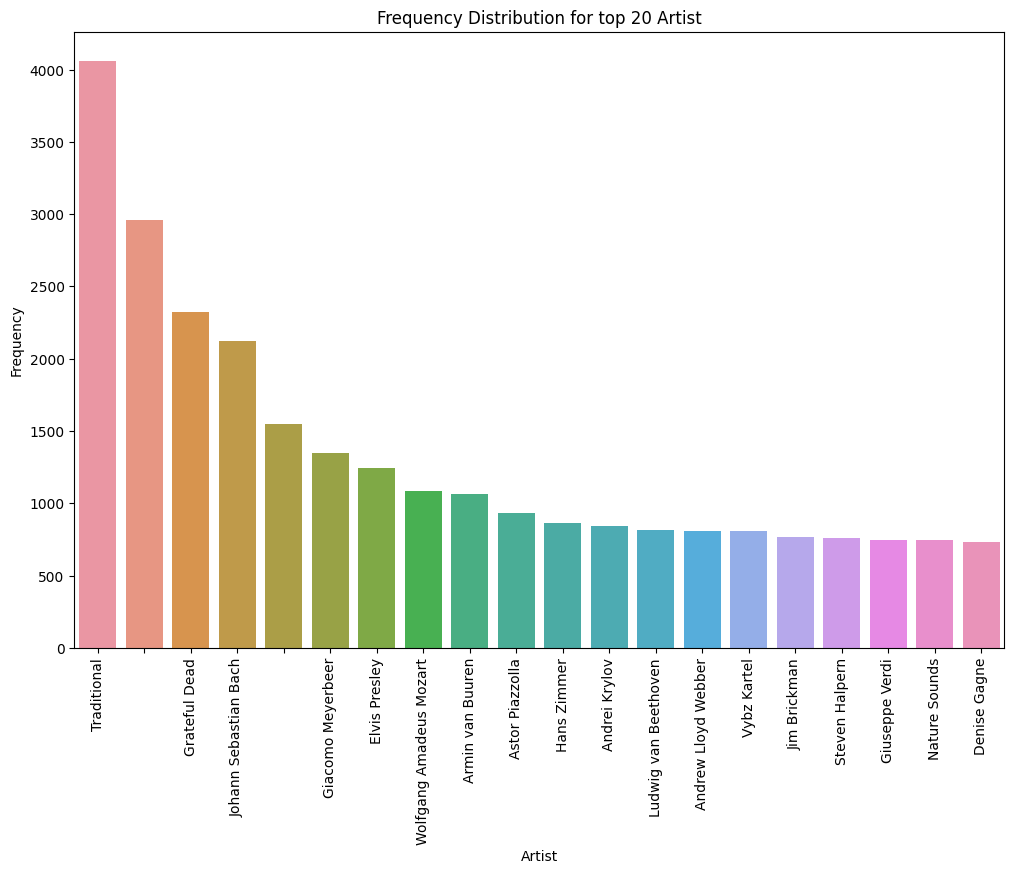

In [44]:
# Bar Chart : frequency distribution for Artist
plt.figure(figsize=(12, 8))
sns.countplot(x='artist_name', data=df, order=df['artist_name'].value_counts().index[:20])
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.title('Frequency Distribution for top 20 Artist')
plt.xticks(rotation=90)
plt.show()

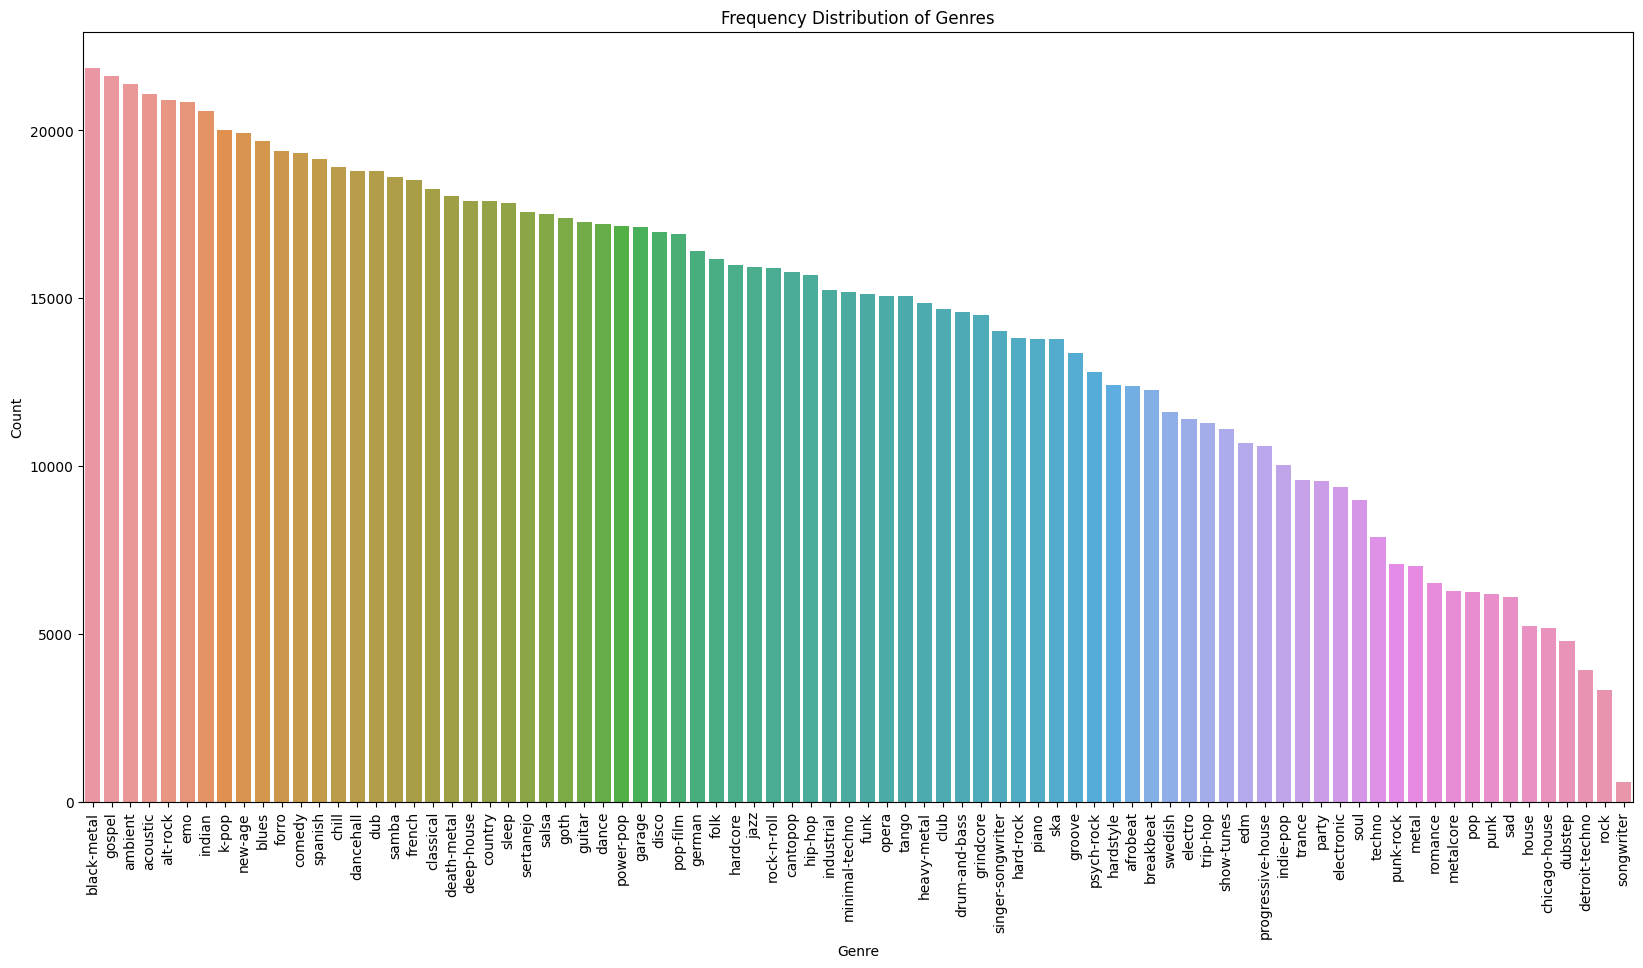

In [46]:
# Bar Chart : Frequency Distribution for Genre
plt.figure(figsize=(20, 10))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Frequency Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

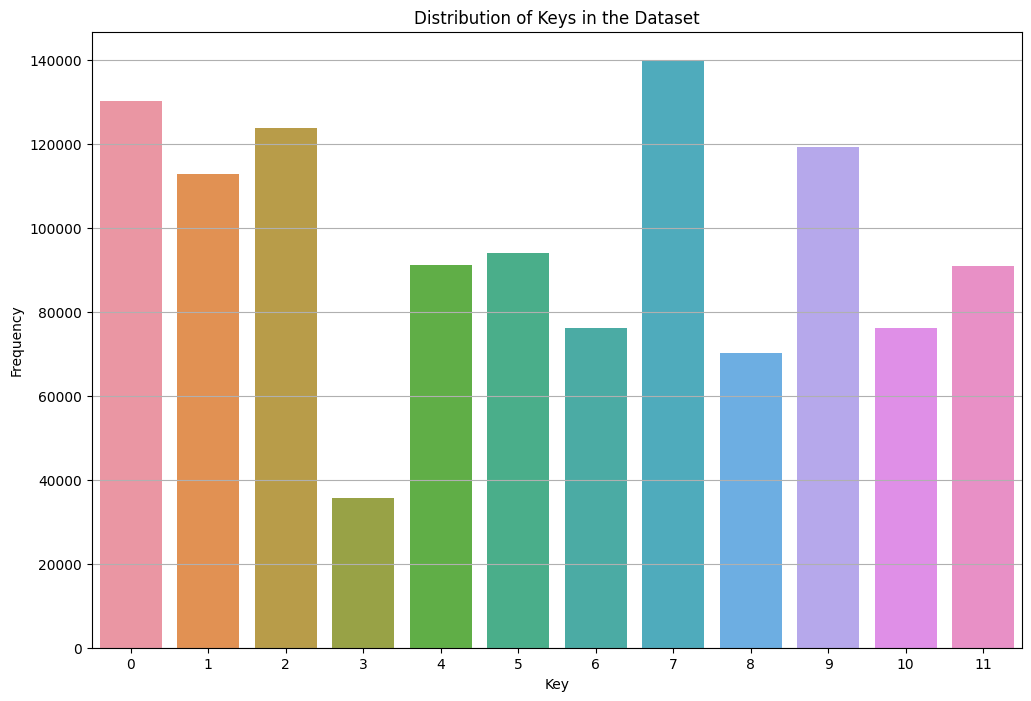

In [47]:
# Bar Chart : frequency distribution for key
plt.figure(figsize=(12, 8))
sns.countplot(x='key', data=df, order=df['key'].value_counts().sort_index().index)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Distribution of Keys in the Dataset')
plt.grid(axis='y')
plt.show()

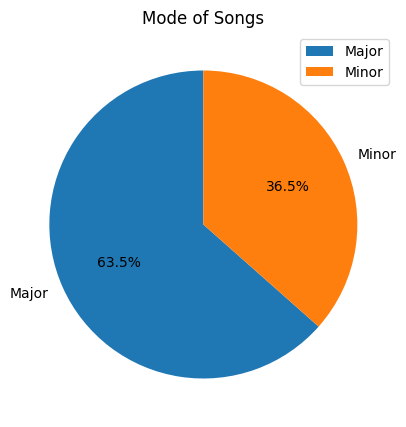

In [48]:
# Pie chart : the distribution of major and minor songs
mode_counts = df['mode'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(mode_counts, labels=['Major', 'Minor'], autopct='%1.1f%%', startangle=90)
plt.title('Mode of Songs')
plt.legend()
plt.show()

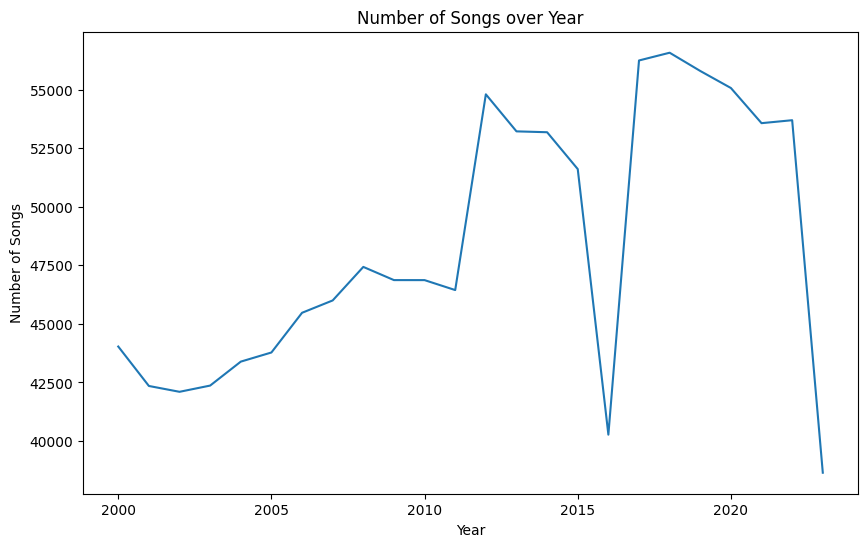

In [51]:
# Line chart: Count the number of songs over each year
year_count = df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_count, x='year', y='count')

plt.title('Number of Songs over Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

In [52]:
# Group by Year with the mean of the song features
year_df = df.groupby(by=["year"]).mean().reset_index()
year_df

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,2000,10.736181,0.528590,0.604446,5.289912,-10.148483,0.664464,0.084210,0.362329,0.239420,0.219137,0.507284,119.853729,3.876891,4.331459
1,2001,11.253359,0.524793,0.600322,5.304999,-10.097640,0.663715,0.085461,0.361939,0.245478,0.219772,0.488250,119.115112,3.874501,4.365222
2,2002,11.679041,0.531639,0.622776,5.305591,-9.587970,0.653152,0.085943,0.339893,0.243533,0.224506,0.498285,119.802345,3.885136,4.388925
3,2003,12.435730,0.526321,0.627254,5.283657,-9.375995,0.659200,0.087809,0.340997,0.240454,0.224276,0.491708,120.105942,3.875142,4.316647
4,2004,12.298732,0.530033,0.637659,5.299723,-9.109424,0.650196,0.087039,0.332912,0.228983,0.228731,0.491882,120.454727,3.886840,4.306355
5,2005,13.424920,0.525539,0.631740,5.320009,-9.267861,0.649223,0.088181,0.333991,0.241071,0.228456,0.487335,120.741859,3.877136,4.361092
6,2006,13.137903,0.533050,0.634384,5.322668,-9.139491,0.647051,0.089972,0.332268,0.248002,0.224145,0.486790,120.946907,3.884132,4.386501
7,2007,13.471446,0.533309,0.644446,5.321971,-9.028157,0.644595,0.092813,0.324328,0.251806,0.228937,0.478078,121.062447,3.885546,4.415313
8,2008,13.462894,0.534577,0.651215,5.297900,-8.763337,0.647306,0.090511,0.310635,0.258509,0.226360,0.476483,122.401329,3.888514,4.398722
9,2009,14.404596,0.535684,0.648119,5.276515,-8.807054,0.645736,0.092920,0.312339,0.268276,0.229907,0.469708,122.052399,3.881371,4.427241


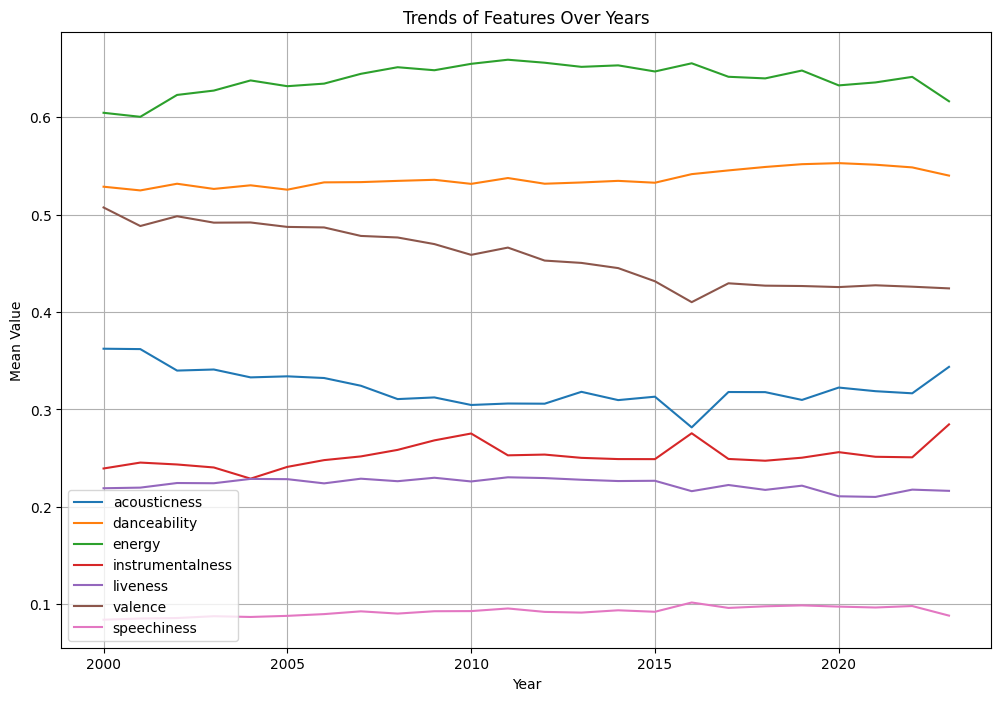

In [53]:
# Line chart : trend of features over year
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness']

plt.figure(figsize=(12, 8))

for feature in features:
    plt.plot(year_df['year'], year_df[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Trends of Features Over Years')
plt.legend()
plt.grid(True)
plt.show()

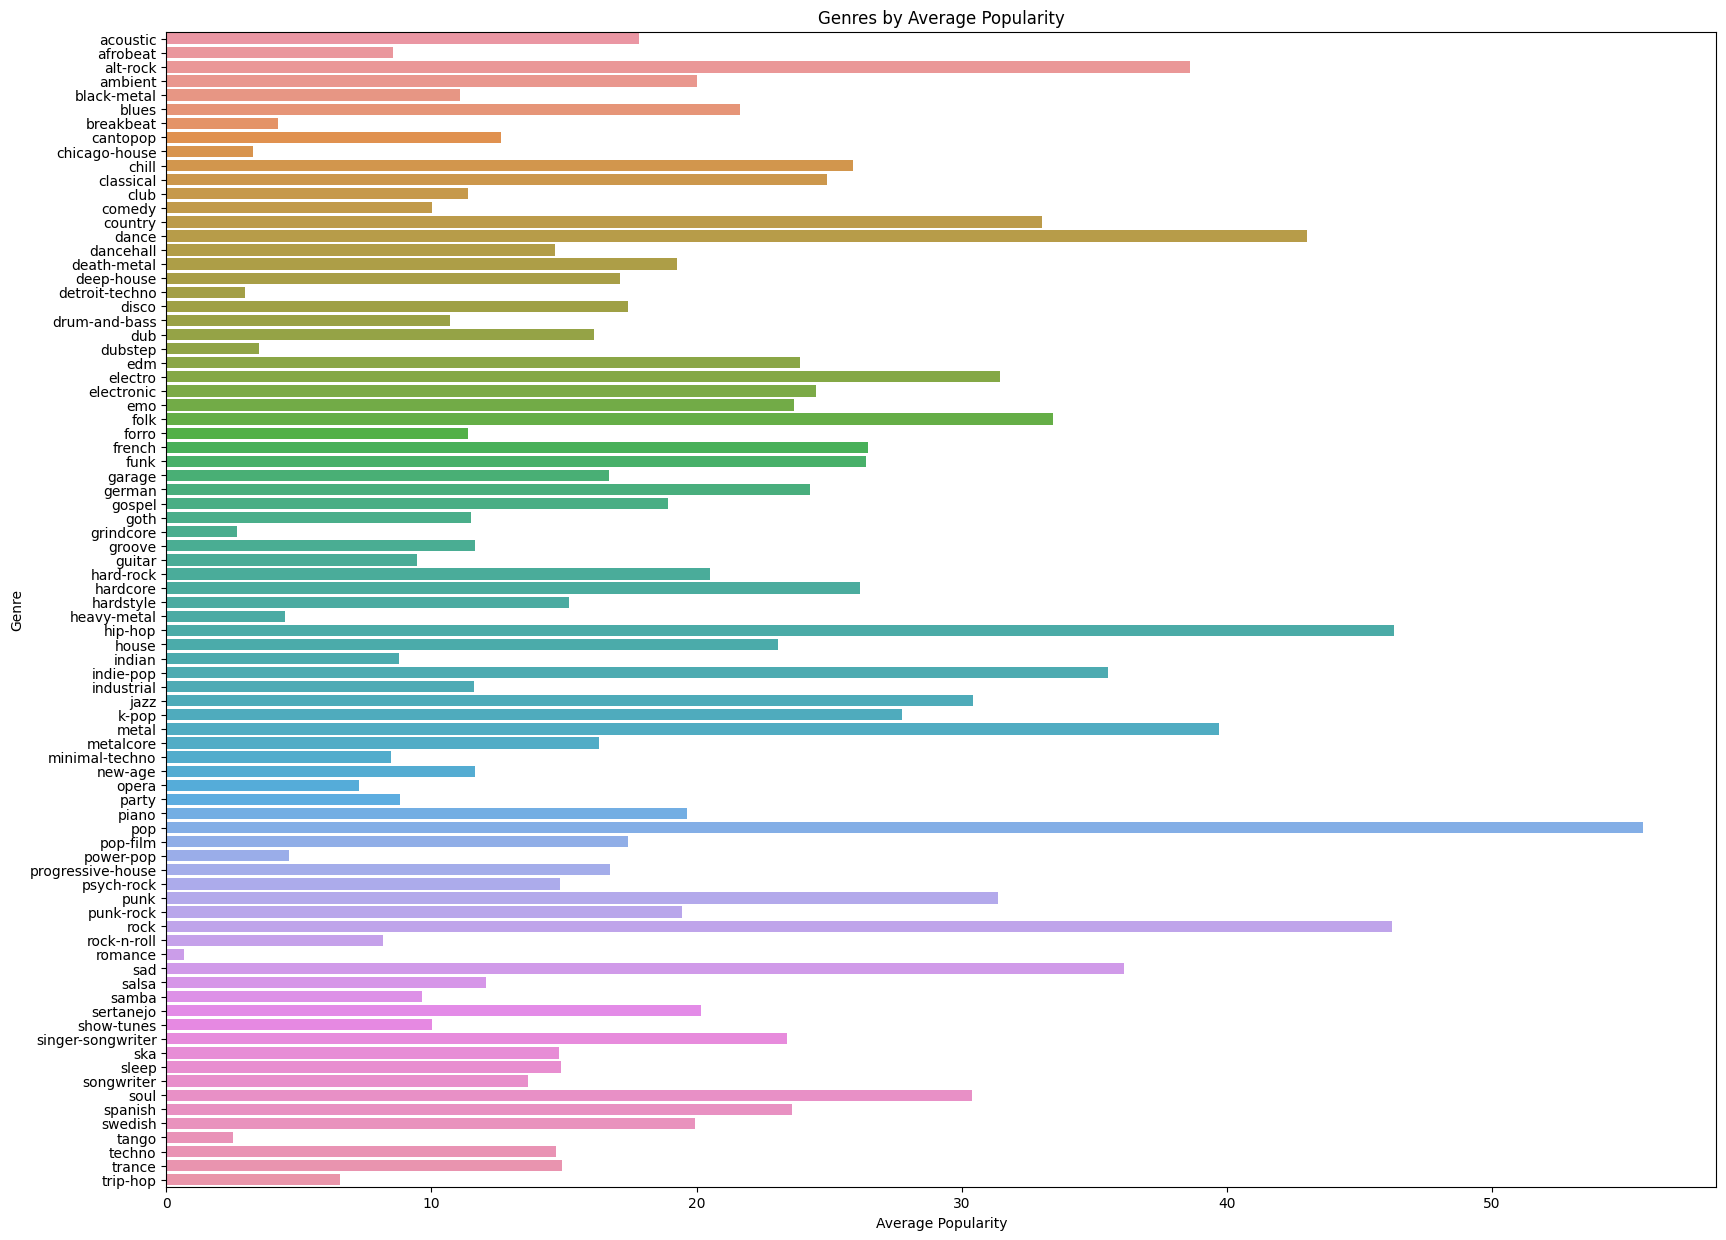

In [54]:
# Bar plot: Genre vs Average Popularity
genre_vs_popularity = df.groupby('genre')['popularity'].mean().reset_index()

plt.figure(figsize=(20,15))
sns.barplot(x='popularity', y='genre', data=genre_vs_popularity)
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Genres by Average Popularity')
plt.show()

In [55]:
# top 10 genre by the average popularity
sorted_genres = genre_vs_popularity.sort_values('popularity', ascending=False)
top_genre = sorted_genres.head(10)
top_genre

,genre,popularity
56,pop,55.685806
42,hip-hop,46.315736
63,rock,46.228985
14,dance,43.034337
49,metal,39.698860
2,alt-rock,38.596807
66,sad,36.122248
45,indie-pop,35.518260
27,folk,33.448547
13,country,33.047419


In [56]:
# Top Genre vs Mean Popularity by Year
year_data = df[(df['year'] >= 2000) & (df['year'] <= 2023)]
genre_popularity = year_data.groupby(['year', 'genre'])['popularity'].mean().reset_index()

top_genres_by_year = genre_popularity.groupby('year').apply(lambda x: x.nlargest(10, 'popularity')).reset_index(drop=True)

fig = px.bar(top_genres_by_year, x='popularity', y='genre', animation_frame='year',
             animation_group='genre', color='genre', orientation='h',
             title='Top 10 Genres by Mean Popularity (2000-2023)')
fig.update_layout(xaxis_title='Mean Popularity', yaxis_title='Genre')
fig.show()

### Data Exploration:

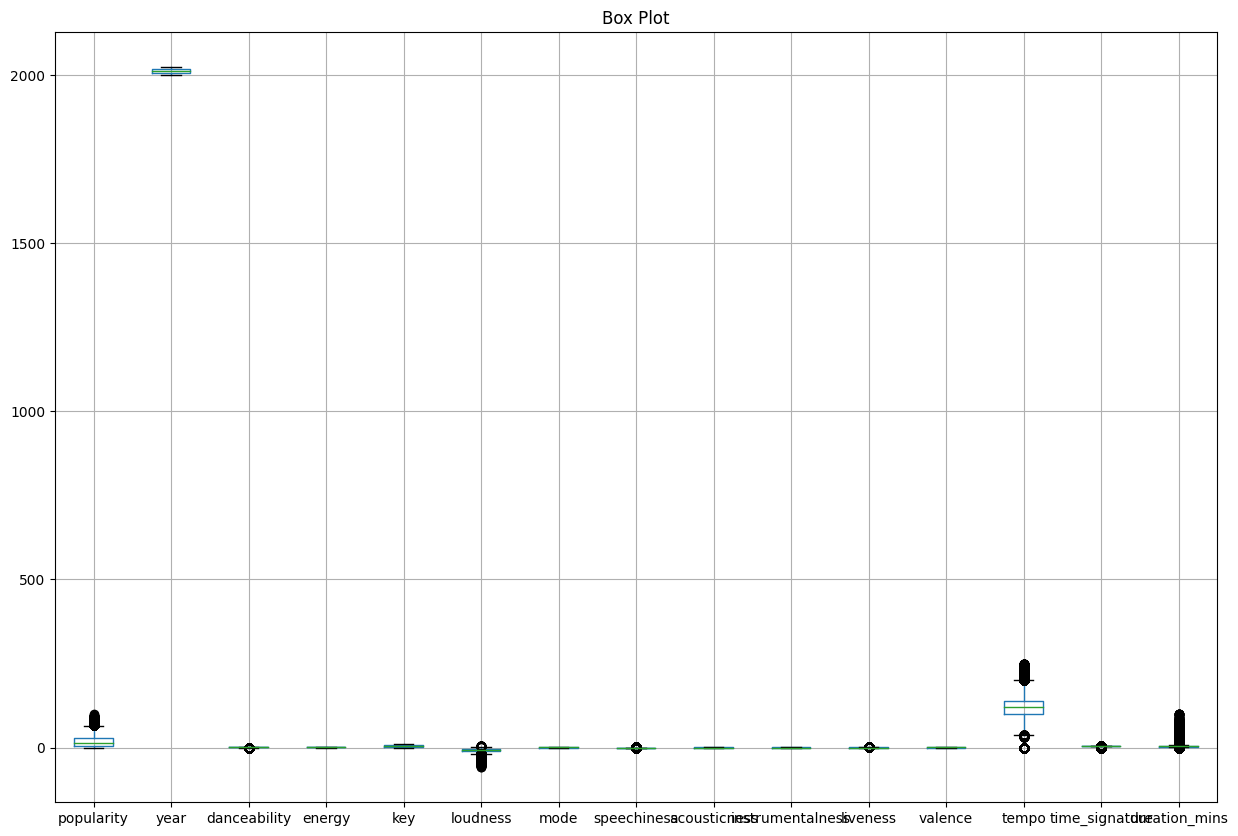

In [57]:
# Box Plot : All column of the data that does not have object datatype
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plot')
plt.show()

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'duration_mins'}>, <Axes: >]],
      dtype=object)

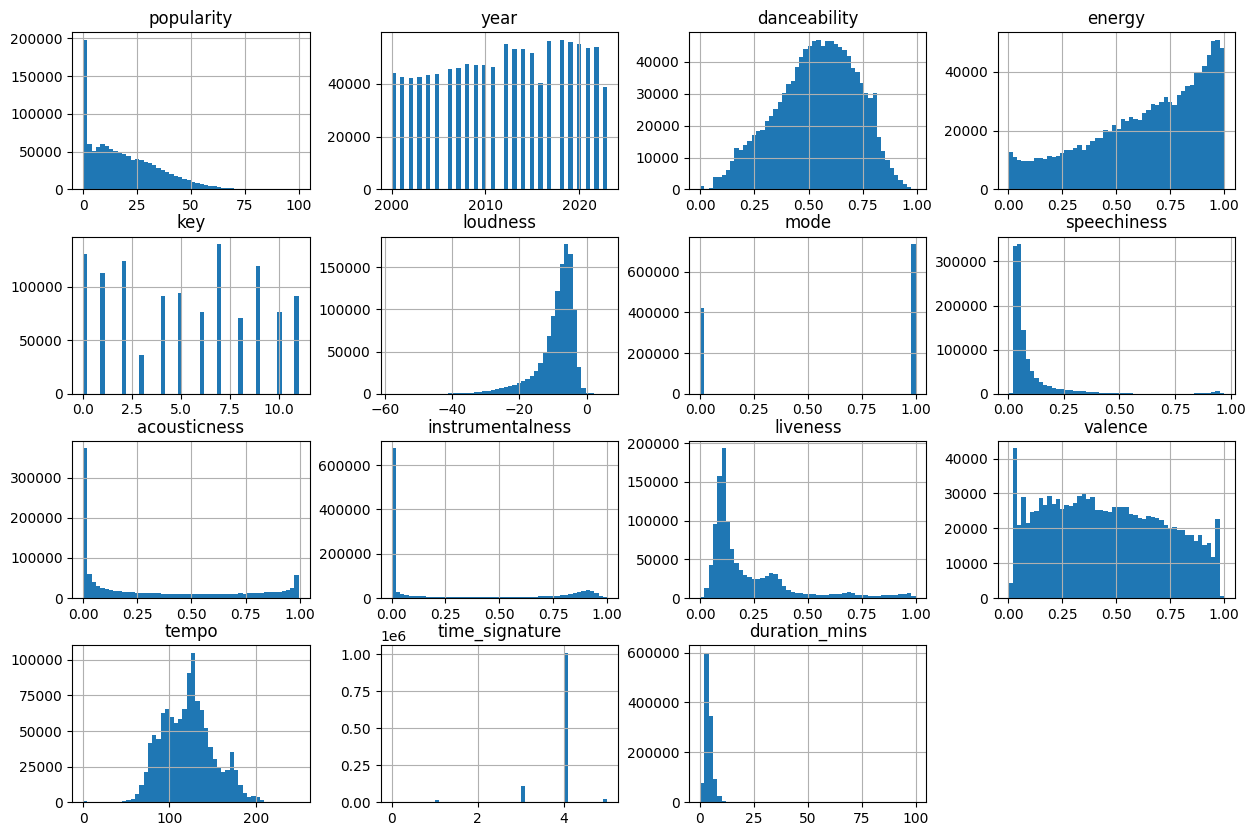

In [58]:
# Histogram : All column of the data that does not have object datatype
df.hist(bins=50, figsize=(15, 10))

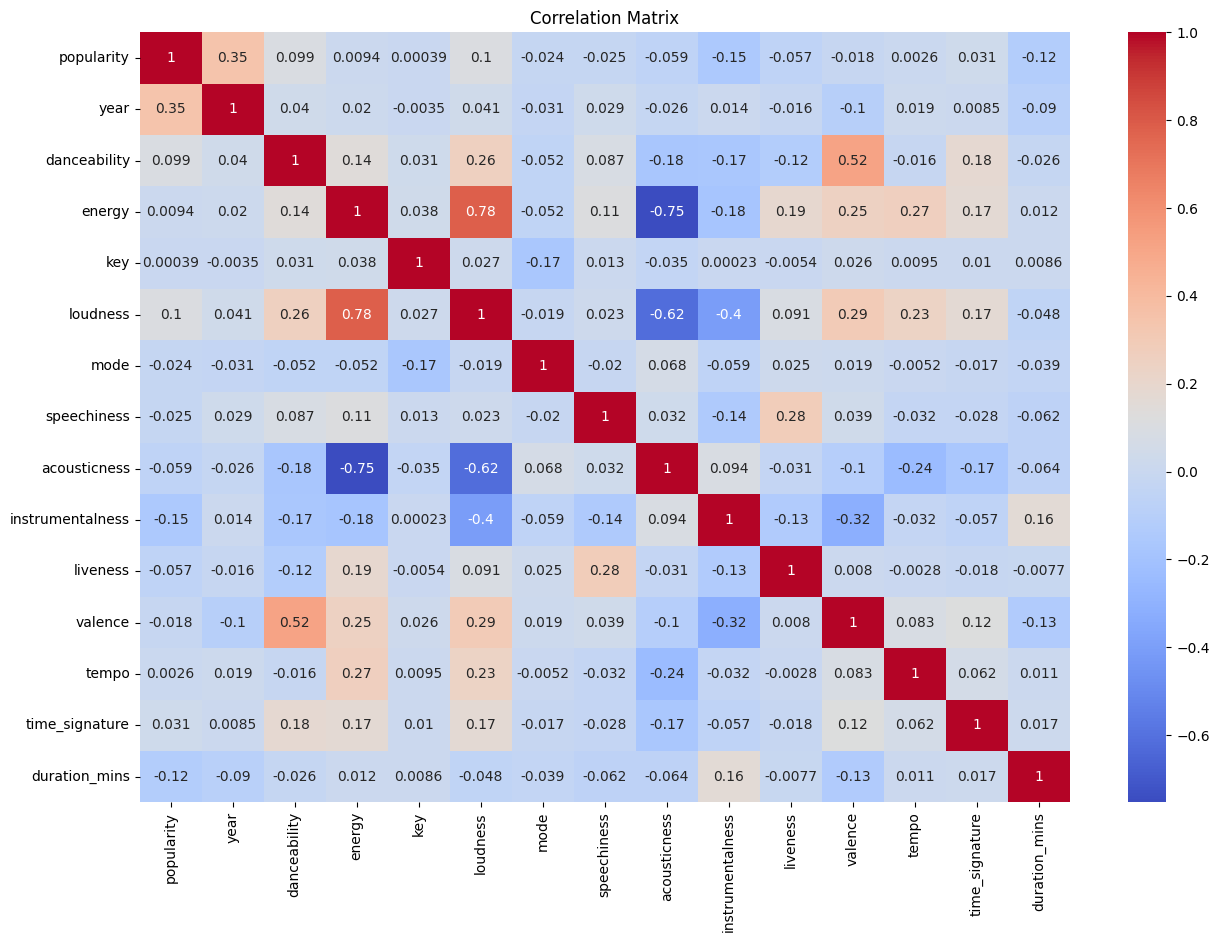

In [59]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identify most and least correlation pair from the Correlation Matrix

In [60]:
#identifying highly correlated pairs
corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)

negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 danceability  valence         0.519900
energy        loudness        0.781006
loudness      energy          0.781006
valence       danceability    0.519900
dtype: float64

Less Correlated Pairs: 
 energy        acousticness   -0.752662
loudness      acousticness   -0.621698
acousticness  energy         -0.752662
              loudness       -0.621698
dtype: float64


From the highest correlated pair which is 'danceability' and 'valence', investigate the relationship using scatterplot

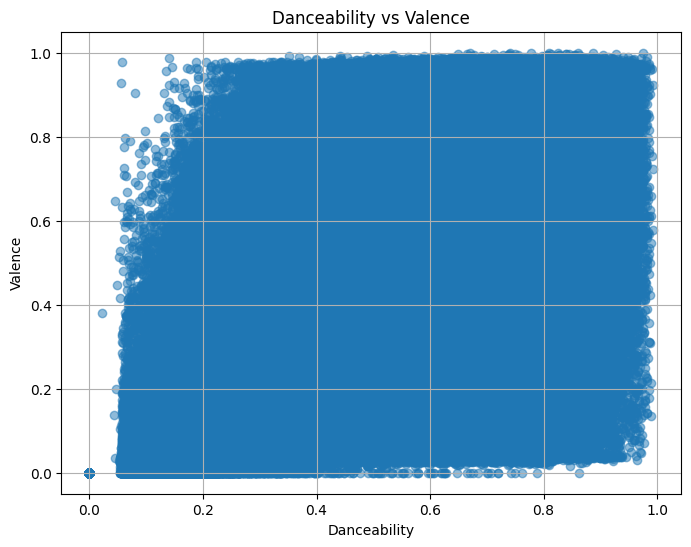

In [61]:
# Scatter plot : Danceability vs Valence
plt.figure(figsize=(8, 6))
plt.scatter(df['danceability'], df['valence'], alpha=0.5)
plt.title('Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

It shows that as the song's danceability increases, the valence increases as well.

Beside 'danceability' and 'valence', another highly correlated pair is 'energy' and 'loudness'.

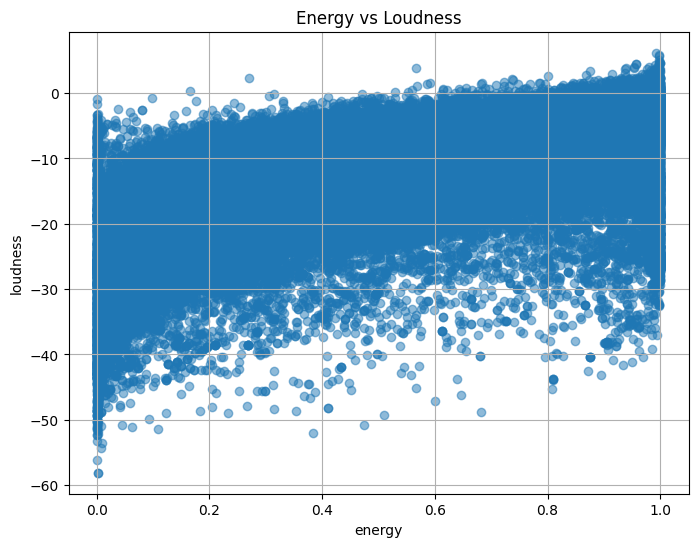

In [62]:
# Scatter plot :Energy vs Loudness
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'], alpha=0.5)
plt.title('Energy vs Loudness')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.grid(True)
plt.show()

From the least correlated pairs 'acousticness' is paired with 'energy' and'loudness'

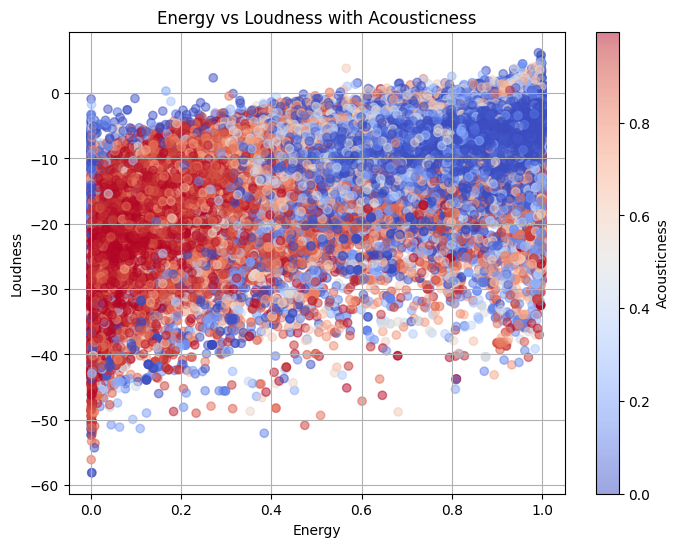

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'], c=df['acousticness'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Acousticness')
plt.title('Energy vs Loudness with Acousticness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

When the 'acousticness' is highest, 'Energy' and 'Loudness' is the lowest.
While the 'acousticness' is at the lowest, when 'Energy' and 'Loudness' is the highest.